## Work - 使用深度學習進行cifar10辨認
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [30]:
import os
import keras
from keras.datasets import mnist 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy 

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [ ]:
#包含 6 萬筆 32*32 低解析度之彩色圖片

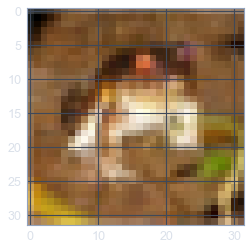

In [19]:
plt.imshow(x_train[0])

In [36]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    


# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [37]:
x_train.shape[1:]

(3072,)

In [42]:
model = Sequential()
model.add(Dense(512,activation="relu",input_shape=(x_train.shape[1:])))
model.add(Dense(256,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(10,activation="softmax", name="output"))

In [43]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_15 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_16 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 1,746,506
Trainable params: 1,746,506
Non-trainable params: 0
_________________________________________________________________


In [8]:
# def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
#     input_layer = keras.layers.Input(input_shape)
    
#     for i, n_units in enumerate(num_neurons):
#         if i == 0:
#             x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
#         else:
#             x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
#     out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
#     model = keras.models.Model(inputs=[input_layer], outputs=[out])
#     return model
# model = build_mlp(input_shape=x_train.shape[1:])

In [9]:

model.summary()

W0712 01:49:17.188389   856 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0712 01:49:17.236392   856 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0712 01:49:17.246392   856 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [44]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [45]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [46]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 55us/step - loss: 1.9397 - accuracy: 0.2896 - val_loss: 1.7940 - val_accuracy: 0.3571
Epoch 2/100
50000/50000 [==============================] - 2s 41us/step - loss: 1.7187 - accuracy: 0.3823 - val_loss: 1.6606 - val_accuracy: 0.4023
Epoch 3/100
50000/50000 [==============================] - 2s 41us/step - loss: 1.6324 - accuracy: 0.4146 - val_loss: 1.6151 - val_accuracy: 0.4176
Epoch 4/100
50000/50000 [==============================] - 2s 41us/step - loss: 1.5660 - accuracy: 0.4408 - val_loss: 1.5835 - val_accuracy: 0.4436
Epoch 5/100
50000/50000 [==============================] - 2s 42us/step - loss: 1.5219 - accuracy: 0.4578 - val_loss: 1.5223 - val_accuracy: 0.4575
Epoch 6/100
50000/50000 [==============================] - 2s 41us/step - loss: 1.4919 - accuracy: 0.4657 - val_loss: 1.5167 - val_accuracy: 0.4585
Epoch 7/100
50000/50000 [==============================] - 2s

50000/50000 [==============================] - 2s 39us/step - loss: 0.6125 - accuracy: 0.7808 - val_loss: 1.8911 - val_accuracy: 0.5120
Epoch 55/100
50000/50000 [==============================] - 2s 39us/step - loss: 0.6080 - accuracy: 0.7816 - val_loss: 1.9618 - val_accuracy: 0.5113
Epoch 56/100
50000/50000 [==============================] - 2s 40us/step - loss: 0.5747 - accuracy: 0.7937 - val_loss: 1.9348 - val_accuracy: 0.5176
Epoch 57/100
50000/50000 [==============================] - 2s 39us/step - loss: 0.5702 - accuracy: 0.7954 - val_loss: 1.9470 - val_accuracy: 0.5105
Epoch 58/100
50000/50000 [==============================] - 2s 39us/step - loss: 0.5658 - accuracy: 0.7958 - val_loss: 1.9999 - val_accuracy: 0.5102
Epoch 59/100
50000/50000 [==============================] - 2s 39us/step - loss: 0.5690 - accuracy: 0.7956 - val_loss: 2.0761 - val_accuracy: 0.5082
Epoch 60/100
50000/50000 [==============================] - 2s 39us/step - loss: 0.5452 - accuracy: 0.8035 - val_loss: 

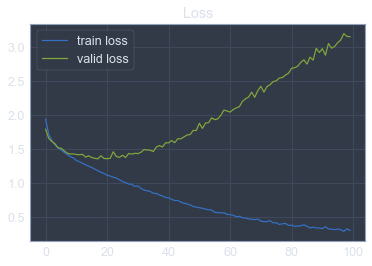

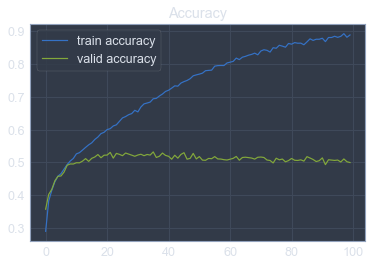

In [49]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()